## Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [109]:
#display maximum rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data loading

In [110]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [111]:
test_copy = test.copy()
train_copy = train.copy()

In [112]:
display(train.columns)
display(train.head(4))

Index(['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country',
       'date', 'hour', 'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_so2_slant_column_number_density',
       'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle',
       'sulphurdioxide_so2_column_number_density_15km', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_azimuth_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_tropospheric_no2_column_number_densi

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052301,828817.9375,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.045475,3771.02721,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214,1.46239,0.00024,0.35915,26.525513,-143.480164,59.220097,70.875954,-0.315206,828578.6250,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097816,828878.6875,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75639

In [113]:
columns_drop = ['id', 'site_id', 'city', 'country']
train.drop(columns=columns_drop, axis=1, inplace=True)
test.drop(columns=columns_drop, axis=1, inplace=True)
display(train.head(4))
display(test.head(4))

,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,6.53257,3.39936,2023-10-25,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052301,828817.9375,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,6.53257,3.39936,2023-11-02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.045475,3771.02721,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214,1.46239,0.00024,0.35915,26.525513,-143.480164,59.220097,70.875954,-0.315206,828578.6250,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,6.53257,3.39936,2023-11-03,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097816,828878.6875,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756392,45185.49959,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.41189,61.045123,-121.307414,41.898269,39.450741
3,6.53257,3.39936,2023-11-08,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,5.61252,-0.22955,2023-09-06,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,25.512329,-0.000028,9.0,0.043537,2825.323242,1.000000,829406.9375,-97.787621,26.897718,-86.884308,25.509418,0.000055,0.000016,0.000040,0.000109,9582.745678,-0.258421,0.019749,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.000243,1.11224,0.000213,0.079645,25.512329,-86.879776,26.926420,-100.330299,-0.258422,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.126056,2.243713,0.286278,230.244171,0.079324,-100.330299,26.926420,-86.879776,25.512329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043065,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,5.61252,-0.22955,2023-09-07,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.036341,2604.788330,1584.809692,829328.6250,70.753090,11.428769,-87.764297,20.935318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408162,829340.750000,76.400116,11.171532,-87.726566,20.951560,0.126282,2.136400,0.273757,230.184377,0.613266,76.400116,11.171532,-87.726566,20.951560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.61252,-0.22955,2023-09-08,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,16.417355,-0.000023,9.0,0.037453,3046.314001,90.699029,829194.5625,71.272375,43.172868,-88.964294,16.440554,0.000062,0.000027,0.000036,0.000134,9582.743944,-0.115200,0.163328,829204.480816,73.117264,43.112466,-89.089083,

In [114]:
missing_vals_train = train.isnull().sum()/len(train)*100
# Sort missing values by percentage (descending order)
sorted_missing_vals = missing_vals_train.sort_values(ascending=False)

# Print missing values and percentages
print("missing values(percentage)")
for col, perc in sorted_missing_vals.items():
  print(f"{col}:{perc:.2f}%")

missing values(percentage)
uvaerosollayerheight_aerosol_height:94.71%
uvaerosollayerheight_solar_zenith_angle:94.71%
uvaerosollayerheight_solar_azimuth_angle:94.71%
uvaerosollayerheight_aerosol_pressure:94.71%
uvaerosollayerheight_aerosol_optical_depth:94.71%
uvaerosollayerheight_sensor_zenith_angle:94.71%
uvaerosollayerheight_sensor_azimuth_angle:94.71%
nitrogendioxide_tropopause_pressure:61.54%
nitrogendioxide_stratospheric_no2_column_number_density:61.54%
nitrogendioxide_no2_slant_column_number_density:61.54%
nitrogendioxide_absorbing_aerosol_index:61.54%
nitrogendioxide_no2_column_number_density:61.54%
nitrogendioxide_cloud_fraction:61.54%
nitrogendioxide_sensor_altitude:61.54%
nitrogendioxide_sensor_azimuth_angle:61.54%
nitrogendioxide_sensor_zenith_angle:61.54%
nitrogendioxide_solar_azimuth_angle:61.54%
nitrogendioxide_tropospheric_no2_column_number_density:61.54%
nitrogendioxide_solar_zenith_angle:61.54%
sulphurdioxide_so2_column_number_density_15km:60.86%
sulphurdioxide_solar_z

In [115]:
missing_vals_test = test.isnull().sum()/len(test)*100
# Sort missing values by percentage (descending order)
sorted_missing_vals = missing_vals_test.sort_values(ascending=False)

# Print missing values and percentages
print("missing values(percentage)")
for col, perc in sorted_missing_vals.items():
  print(f"{col}:{perc:.2f}%")

missing values(percentage)
uvaerosollayerheight_aerosol_pressure:97.70%
uvaerosollayerheight_aerosol_height:97.70%
uvaerosollayerheight_aerosol_optical_depth:97.70%
uvaerosollayerheight_sensor_zenith_angle:97.70%
uvaerosollayerheight_sensor_azimuth_angle:97.70%
uvaerosollayerheight_solar_azimuth_angle:97.70%
uvaerosollayerheight_solar_zenith_angle:97.70%
cloud_cloud_fraction:45.96%
cloud_cloud_top_pressure:45.96%
cloud_cloud_top_height:45.96%
cloud_cloud_base_pressure:45.96%
cloud_cloud_base_height:45.96%
cloud_cloud_optical_depth:45.96%
cloud_surface_albedo:45.96%
cloud_solar_zenith_angle:45.96%
cloud_solar_azimuth_angle:45.96%
cloud_sensor_zenith_angle:45.96%
cloud_sensor_azimuth_angle:45.96%
nitrogendioxide_sensor_zenith_angle:39.31%
nitrogendioxide_tropopause_pressure:39.31%
nitrogendioxide_solar_zenith_angle:39.31%
nitrogendioxide_solar_azimuth_angle:39.31%
nitrogendioxide_sensor_azimuth_angle:39.31%
nitrogendioxide_sensor_altitude:39.31%
nitrogendioxide_cloud_fraction:39.31%
nitr

In [116]:
numerical_columns = train.select_dtypes(exclude='object').columns
numerical_columns.shape

(75,)

In [117]:
train['pm2_5'].nunique()

8068

Index(['site_latitude', 'site_longitude', 'hour',
       'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_so2_slant_column_number_density',
       'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle',
       'sulphurdioxide_so2_column_number_density_15km', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_azimuth_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_tropospheric_no2_column_number_density',
       'nitrogendioxide_stratospheric_no2_column_number_density',
       'nitrogendioxide_no2_slant_column_number_density',
       'nitrogendioxide_tropopause_pressure',
       'nitrogendioxide_absorbing_aerosol_index',
       'nitrogendioxide_cloud_fraction', 'nitrogendioxide_sensor_altitude',
       'nitrogendioxide_sensor_azimuth_angle',
       'nitrogendioxide_sensor_zenith_angle',
       'nitrogendioxide_solar_azimuth_angle',
       'nitrogendioxide_solar_zenith_angle',
       'formaldehyde_tropospheric_hcho_column_number_density',
       'formaldehyde_tropospheric_hcho_column_number_density_amf',
       'formaldehyde_hcho_slant_column_number_density',
       'formaldehyde_cloud_fraction', 'formaldehyde_solar_zenith_angle',
       'formaldehyde_solar_azimuth_angle', 'formaldehyde_sensor_zenith_angle',
       'formaldehyde_sensor_azimuth_angle',
       'uvaerosolindex_absorbing_aerosol_index',
       'uvaerosolindex_sensor_altitude', 'uvaerosolindex_sensor_azimuth_angle',
       'uvaerosolindex_sensor_zenith_angle',
       'uvaerosolindex_solar_azimuth_angle',
       'uvaerosolindex_solar_zenith_angle', 'ozone_o3_column_number_density',
       'ozone_o3_column_number_density_amf',
       'ozone_o3_slant_column_number_density',
       'ozone_o3_effective_temperature', 'ozone_cloud_fraction',
       'ozone_sensor_azimuth_angle', 'ozone_sensor_zenith_angle',
       'ozone_solar_azimuth_angle', 'ozone_solar_zenith_angle',
       'uvaerosollayerheight_aerosol_height',
       'uvaerosollayerheight_aerosol_pressure',
       'uvaerosollayerheight_aerosol_optical_depth',
       'uvaerosollayerheight_sensor_zenith_angle',
       'uvaerosollayerheight_sensor_azimuth_angle',
       'uvaerosollayerheight_solar_azimuth_angle',
       'uvaerosollayerheight_solar_zenith_angle', 'cloud_cloud_fraction',
       'cloud_cloud_top_pressure', 'cloud_cloud_top_height',
       'cloud_cloud_base_pressure', 'cloud_cloud_base_height',
       'cloud_cloud_optical_depth', 'cloud_surface_albedo',
       'cloud_sensor_azimuth_angle', 'cloud_sensor_zenith_angle',
       'cloud_solar_azimuth_angle', 'cloud_solar_zenith_angle', 'pm2_5'],
      dtype='object')

In [118]:
train['uvaerosollayerheight_sensor_azimuth_angle'].describe()

count    427.000000
mean     -25.433032
std       86.512148
min     -103.229645
25%     -100.492546
50%      -97.768539
75%       74.575745
max       77.191833
Name: uvaerosollayerheight_sensor_azimuth_angle, dtype: float64

In [119]:
import os  # For creating directories
# Create a directory to store images (optional)
image_dir = "histogram_images"
os.makedirs(image_dir, exist_ok=True)  # Create directory if it doesn't exist

# Loop through each feature
for feature in numerical_columns:
  plt.hist(train[feature])
  plt.title(f"Distribution of {feature}")
  plt.xlabel(feature)
  plt.ylabel("Frequency")

  # Save the figure as a PNG image within the directory
  filename = os.path.join(image_dir, f"histogram_{feature}.png")
  plt.savefig(filename)

  # Clear the plot for the next iteration
  plt.clf()


<Figure size 640x480 with 0 Axes>

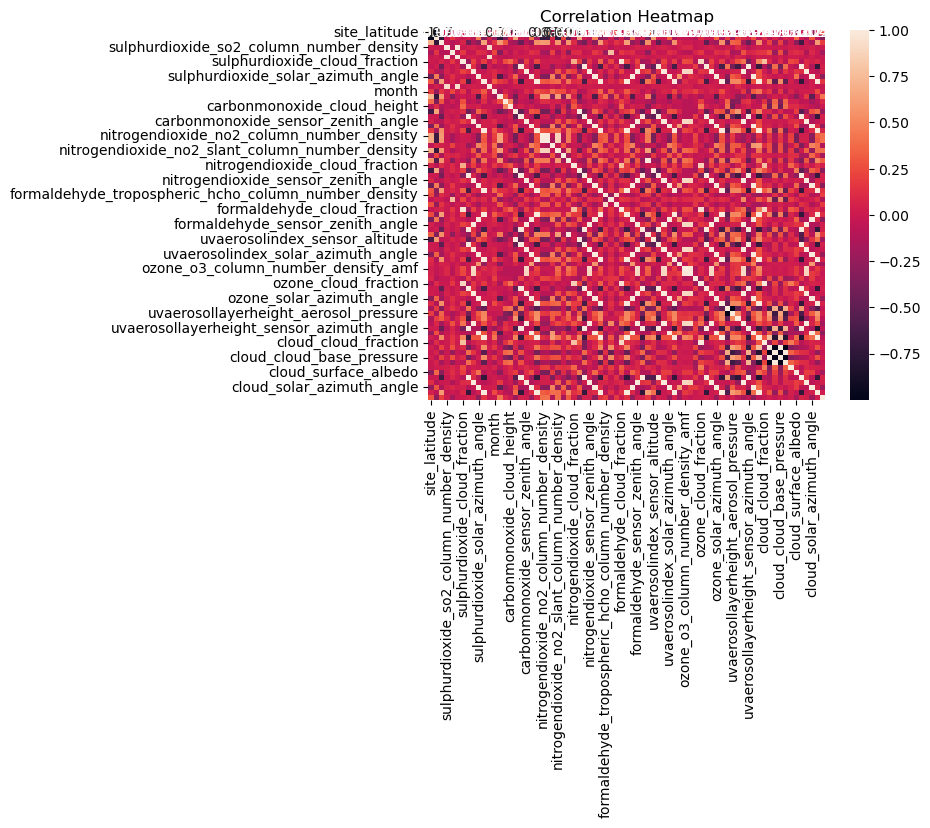

In [120]:
# Correlation matrix
correlation = train[numerical_columns].corr()

# Heatmap with seaborn
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [121]:
#filling missing data with mode in categorical columns
for col in (train.select_dtypes(include='object').columns):
    if col != 'pm2_5':
        mode = train[col].mode()[0]
        train[col].fillna(mode, inplace=True)
        test[col].fillna(mode, inplace=True)
#filling missing data with mean in numerical columns
for col in (train.select_dtypes(exclude='object').columns):
    if col != 'pm2_5':
        mean = train[col].median()
        train[col].fillna(mean, inplace=True)
        test[col].fillna(mean, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_14788\339861962.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(mode, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_14788\339861962.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

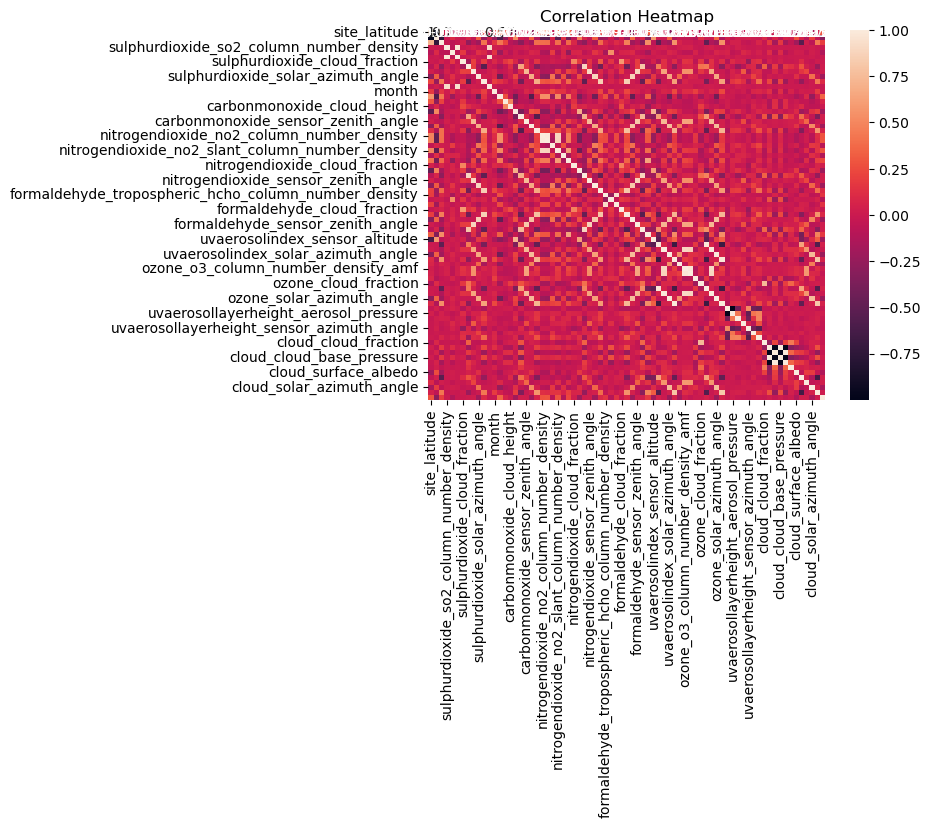

<Axes: >

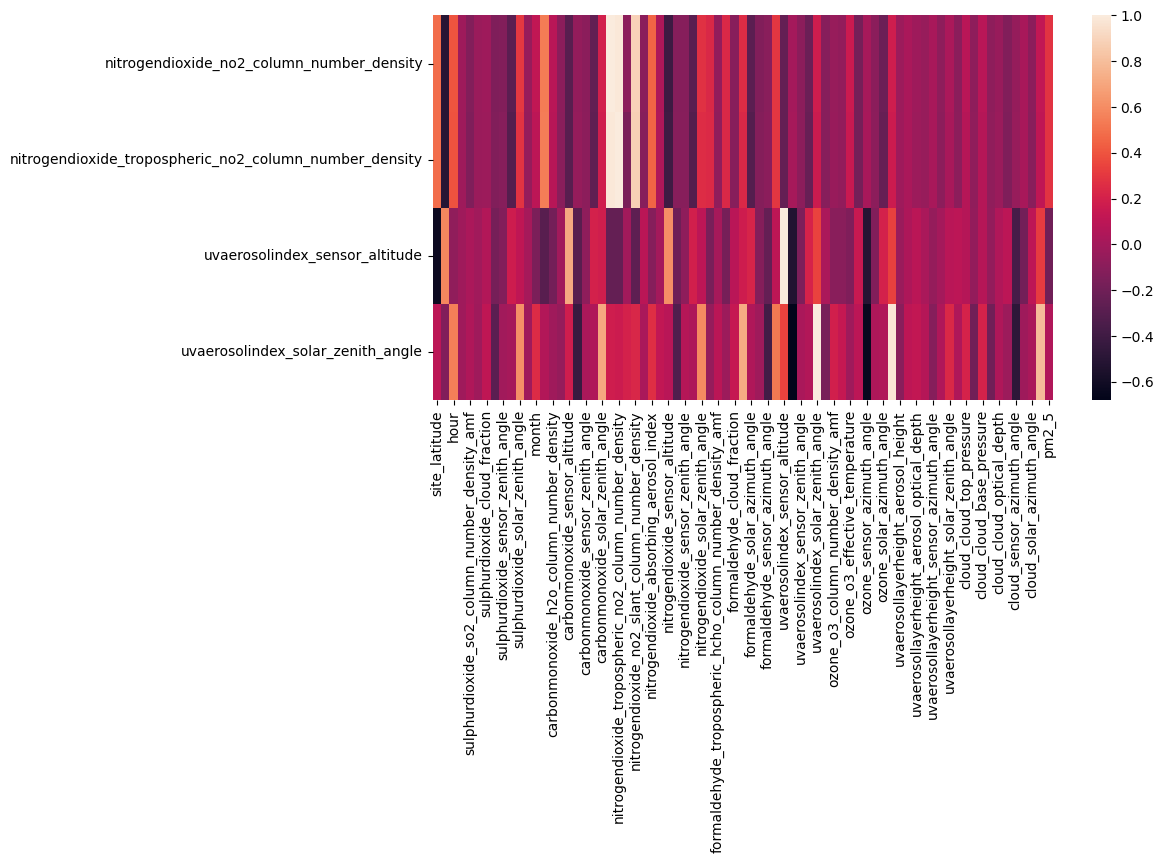

In [122]:
# Correlation matrix
correlation = train[numerical_columns].corr()

# Heatmap with seaborn
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

corr_df = train.select_dtypes(exclude='object').corr()

# only looking at correlations showing a coefficient higher than 0.01
corr_df = corr_df[abs(corr_df)>0.005].dropna(how='any',axis=0)
corr_df = corr_df[abs(corr_df)>0.005].dropna(how='any',axis=1)

plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df)

#VIF

In [123]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = train[considered_features].dropna()
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# features to consider removing
considered_features = list(correlation.index)

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
65,cloud_cloud_top_height,11151.379364
67,cloud_cloud_base_height,11042.925968
66,cloud_cloud_base_pressure,3591.468713
64,cloud_cloud_top_pressure,3579.735478
49,ozone_o3_slant_column_number_density,905.844564
48,ozone_o3_column_number_density_amf,847.442613
56,uvaerosollayerheight_aerosol_height,431.477825
57,uvaerosollayerheight_aerosol_pressure,427.769166
43,uvaerosolindex_sensor_azimuth_angle,154.177262
52,ozone_sensor_azimuth_angle,153.221338


The columns below identified for deletion after rigorous testing of using pair plots

In [124]:
cols_del = ['sulphurdioxide_sensor_zenith_angle','sulphurdioxide_solar_azimuth_angle',
            'nitrogendioxide_solar_azimuth_angle', 'formaldehyde_sensor_zenith_angle',
            'nitrogendioxide_solar_zenith_angle','site_longitude','formaldehyde_sensor_azimuth_angle',
             'formaldehyde_tropospheric_hcho_column_number_density',
             'nitrogendioxide_sensor_azimuth_angle','uvaerosolindex_sensor_zenith_angle',
            'nitrogendioxide_no2_column_number_density','ozone_solar_azimuth_angle',
            'uvaerosollayerheight_aerosol_pressure', 'uvaerosolindex_sensor_azimuth_angle',
            'ozone_solar_zenith_angle','cloud_cloud_top_height','cloud_cloud_base_height',
            'cloud_cloud_top_pressure', 'ozone_o3_column_number_density_amf' ]

In [125]:
train.drop(cols_del, axis=1, inplace=True)
test.drop(cols_del, axis=1, inplace=True)

In [126]:
display(train.shape)
display(test.shape)

(8071, 57)

(2783, 56)

Ended: Midnight April 10th 2024


## Encoding the categorical variables and then scaling the data

In [127]:
#num_cols = train.select_dtypes(exclude='object').columns
cats_col = train.select_dtypes(include='object').columns
cats_col

Index(['date'], dtype='object')

In [128]:
train['date'].nunique()

325

In [129]:
filter_cats = [col for col in cats_col if col != 'date']
train = train= pd.get_dummies(train, columns=filter_cats, drop_first=True, dtype=int)
test = test = pd.get_dummies(test, columns=filter_cats, drop_first=True, dtype=int)

In [130]:
display(train.head(5))
display(train.shape)
display(test.shape)
display(test.head(5))

,site_latitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_base_pressure,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,6.53257,2023-10-25,13,0.000012,0.669632,0.000007,0.123876,71.653160,27.537424,0.000003,10.0,0.032276,2068.565907,1916.541260,829606.937500,68.435028,42.366791,-84.062061,28.928921,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,0.996883,0.000106,0.183912,28.277781,-86.868323,0.052301,828817.9375,-123.523796,33.745914,0.122055,0.285803,230.693756,0.906039,-100.805145,21.720518,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.562470,60432.792969,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,12.015000
1,6.53257,2023-11-02,12,0.000012,0.669632,0.000007,0.123876,71.653160,27.537424,0.000003,11.0,0.045475,3771.027210,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,1.462390,0.000240,0.359150,26.525513,-143.480164,-0.315206,828578.6250,-143.480164,26.525513,0.116975,0.362203,228.260193,0.364713,70.875954,59.220097,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.562470,60432.792969,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,42.267200
2,6.53257,2023-11-03,13,0.000012,0.669632,0.000007,0.123876,71.653160,27.537424,0.000003,11.0,0.032276,2068.565907,1916.541260,829606.937500,68.435028,42.366791,-84.062061,28.928921,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,0.996883,0.000106,0.183912,28.277781,-86.868323,1.097816,828878.6875,-121.307121,41.898113,0.117559,0.384168,224.102463,0.754163,-96.411942,61.045010,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.756392,51171.802486,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,6.53257,2023-11-08,14,0.000012,0.669632,0.000007,0.123876,71.653160,27.537424,0.000003,11.0,0.032276,2068.565907,1916.541260,829606.937500,68.435028,42.366791,-84.062061,28.928921,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,0.996883,0.000106,0.183912,28.277781,-86.868323,0.591543,828920.6875,-122.218231,43.923038,0.118412,0.416643,226.529633,1.000000,-95.863083,65.50

(8071, 57)

(2783, 56)

,site_latitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_base_pressure,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,5.61252,2023-09-06,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,25.512329,-0.000028,9.0,0.043537,2825.323242,1.000000,829406.9375,-97.787621,26.897718,-86.884308,25.509418,0.000016,0.000040,0.000109,9582.745678,-0.258421,0.019749,829420.312500,26.926420,1.112240,0.000213,0.079645,25.512329,-86.879776,-0.258422,829420.312500,-86.879776,25.512329,0.126056,0.286278,230.244171,0.079324,-100.330299,26.926420,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.043065,83569.504246,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,5.61252,2023-09-07,13,0.000012,0.669632,0.000007,0.123876,71.653160,27.537424,0.000003,9.0,0.036341,2604.788330,1584.809692,829328.6250,70.753090,11.428769,-87.764297,20.935318,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,0.996883,0.000106,0.183912,28.277781,-86.868323,-0.408162,829340.750000,-87.726566,20.951560,0.126282,0.273757,230.184377,0.613266,76.400116,11.171532,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.562470,60432.792969,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745
2,5.61252,2023-09-08,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,16.417355,-0.000023,9.0,0.037453,3046.314001,90.699029,829194.5625,71.272375,43.172868,-88.964294,16.440554,0.000027,0.000036,0.000134,9582.743944,-0.115200,0.163328,829204.480816,43.112466,1.345840,0.000127,0.163160,16.417355,-89.089083,-0.115169,829204.480816,-89.089083,16.417355,0.126162,0.311882,237.772241,0.164370,73.117264,43.112466,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.562470,60432.792969,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745
3,5.61252,2023-09-09,12,0.000012,0.669632,0.000007,0.123876,71.653160,27.537424,0.000003,9.0,0.032276,2068.565907,1916.541260,829606.9375,68.435028,42.366791,-84.062061,28.928921,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,0.996883,0.000106,0.183912,28.277781,-86.868323,-1.116044,829067.312500,-90.875526,11.865146,0.121339,0.378890,225.704056,0.845910,70.680077,61.874397,1776.253784,1.727938,28.871037,-97.76

In [131]:
train['date'].head(4)

0    2023-10-25
1    2023-11-02
2    2023-11-03
3    2023-11-08
Name: date, dtype: object

In [132]:
dates = train['date']

In [133]:
dates_dt = pd.to_datetime(dates)
dates_dt = pd.to_datetime(dates, format="%Y-%m-%d")

year = dates_dt.dt.year
month = dates_dt.dt.month


In [134]:
#train dataset
train['year'] = year
train['month'] = month

#test dataset
test['year'] = year
test['month'] = month

End 24th April 2:42 AM

In [135]:
#dropping the date column feature that we no longer need
train.drop(columns='date', axis=1, inplace=True)
test.drop(columns='date', axis=1, inplace=True)

### Scaling the data

In [136]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [137]:
train.head(3)

,site_latitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_base_pressure,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,year
0,6.53257,13,0.000012,0.669632,0.000007,0.123876,71.65316,27.537424,0.000003,10,0.032276,2068.565907,1916.541260,829606.937500,68.435028,42.366791,-84.062061,28.928921,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,0.996883,0.000106,0.183912,28.277781,-86.868323,0.052301,828817.9375,-123.523796,33.745914,0.122055,0.285803,230.693756,0.906039,-100.805145,21.720518,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.562470,60432.792969,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,12.015000,2023
1,6.53257,12,0.000012,0.669632,0.000007,0.123876,71.65316,27.537424,0.000003,11,0.045475,3771.027210,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,1.462390,0.000240,0.359150,26.525513,-143.480164,-0.315206,828578.6250,-143.480164,26.525513,0.116975,0.362203,228.260193,0.364713,70.875954,59.220097,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.562470,60432.792969,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,42.267200,2023
2,6.53257,13,0.000012,0.669632,0.000007,0.123876,71.65316,27.537424,0.000003,11,0.032276,2068.565907,1916.541260,829606.937500,68.435028,42.366791,-84.062061,28.928921,0.000031,0.000033,0.000119,8613.739543,-0.436956,0.071767,829628.954389,40.130777,0.996883,0.000106,0.183912,28.277781,-86.868323,1.097816,828878.6875,-121.307121,41.898113,0.117559,0.384168,224.102463,0.754163,-96.411942,61.045010,1776.253784,1.727938,28.871037,-97.768539,-58.774746,29.426701,0.756392,51171.802486,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741,2023


In [138]:
cols_to_scale = ['site_latitude', 'hour', 'sulphurdioxide_sensor_azimuth_angle',
                 'sulphurdioxide_solar_zenith_angle', 'month', 'carbonmonoxide_h2o_column_number_density',
                 'carbonmonoxide_cloud_height','carbonmonoxide_sensor_altitude','carbonmonoxide_sensor_azimuth_angle',
                 'carbonmonoxide_sensor_zenith_angle','carbonmonoxide_solar_azimuth_angle','carbonmonoxide_solar_zenith_angle',
                 'nitrogendioxide_tropopause_pressure','nitrogendioxide_sensor_altitude','nitrogendioxide_sensor_zenith_angle',
                 'formaldehyde_solar_zenith_angle','formaldehyde_solar_azimuth_angle','uvaerosolindex_sensor_altitude',
                 'uvaerosolindex_solar_azimuth_angle','uvaerosolindex_solar_zenith_angle','ozone_o3_effective_temperature',
                 'ozone_sensor_azimuth_angle','ozone_sensor_zenith_angle','uvaerosollayerheight_aerosol_height',
                 'uvaerosollayerheight_aerosol_optical_depth','uvaerosollayerheight_sensor_zenith_angle',
                 'uvaerosollayerheight_sensor_azimuth_angle','uvaerosollayerheight_solar_azimuth_angle',
                 'uvaerosollayerheight_solar_zenith_angle','cloud_cloud_base_pressure','cloud_cloud_optical_depth',
                 'cloud_sensor_azimuth_angle','cloud_sensor_zenith_angle','cloud_solar_azimuth_angle',
                 'cloud_solar_zenith_angle', 'year', 'formaldehyde_tropospheric_hcho_column_number_density_amf',
                 'uvaerosolindex_absorbing_aerosol_index'
]

In [139]:
# Instantiating the scaler
scaler = StandardScaler()

#making copies of the original dataframe
train_scaled = train.copy()
test_scaled = test.copy()

#scaling the training and test data
train_scaled[cols_to_scale] = scaler.fit_transform(train_scaled[cols_to_scale])
test_scaled[cols_to_scale] = scaler.fit_transform(test_scaled[cols_to_scale])


In [140]:
display(train_scaled.shape)
display(test_scaled.shape)

(8071, 57)

(2783, 56)

## Modelling

In [141]:
# Split the data into features (X) and target (y)
X = train_scaled.drop('pm2_5', axis=1)
y = train_scaled['pm2_5']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [143]:
y_pred = model.predict(X_test)

In [144]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 764.137542107274
